<a href="https://colab.research.google.com/github/ayman-metwally2020/Anomaly-Detection-/blob/main/anomaly_detection_part_5_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ANOMALY DETECTION DAY 3/ANOMALY DETECTION PART 5 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [1]:
#=================================================-
#### Slide 4: Import packages  ####

import os
from pathlib import Path
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import pickle
from math import sqrt
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error




In [10]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/content/data"
print(data_dir)




/
//content/data


In [11]:
#=================================================-
#### Slide 6: Load PJM Energy dataset  ####

pjm_energy = pd.read_csv(str(data_dir) + "/PJME_hourly.csv")
print(pjm_energy.head())
pjm_energy['Datetime'] = pd.to_datetime(pjm_energy['Datetime'])
pjm_energy.dtypes




              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


,0
Datetime,datetime64[ns]
PJME_MW,float64


In [12]:
#=================================================-
#### Slide 7: Extract Date from Datetime  ####

pjm_energy = pjm_energy.sort_values(by=['Datetime'])
pjm_energy = pjm_energy[pjm_energy['Datetime'] > '2018-01-01 00:00:00']
pjm_energy.shape
pjm_energy['Date'] = pjm_energy['Datetime'].dt.date
pjm_energy_datewise = pjm_energy.groupby(by=['Date'])['PJME_MW'].mean()




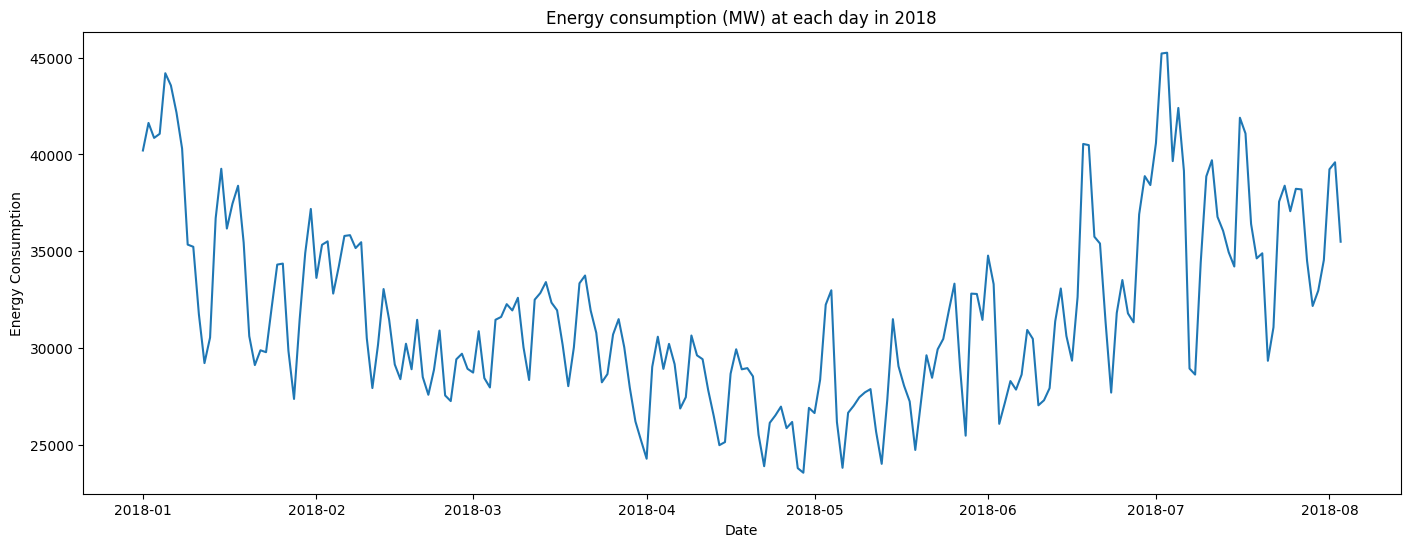

In [13]:
#=================================================-
#### Slide 8: Visualize the Energy consumption for each day  ####

pjm_energy_datewise.plot(x='Date', y='PJME_MW', figsize=(17,6))
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption (MW) at each day in 2018')
plt.show()




In [14]:
#=================================================-
#### Slide 20: Stationarity test  ####

# Perform ADF test on original series.
result_pm = adfuller(pjm_energy_datewise)

print('ADF Statistic: %f' % result_pm[0])
print('p-value: %f' % result_pm[1])




ADF Statistic: -1.625863
p-value: 0.469657


In [15]:
#=================================================-
#### Slide 22: ARIMA Residuals for Anomaly Detection (cont'd)  ####

# Fit the ARIMA model to the data
model = ARIMA(pjm_energy_datewise, order=(2, 1, 2))  # Example order, adjust based on the data
fitted_model = model.fit()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
#=================================================-
#### Slide 23: ARIMA Residuals for Anomaly Detection (cont'd)  ####

# Calculate residuals (observed - fitted values)
residuals = pjm_energy_datewise - fitted_model.fittedvalues
residuals = residuals.dropna()  # Remove NA values

# Drop NA values that might occur due to differencing
residuals = residuals.dropna()

# Define the anomaly detection threshold
threshold = 2 * np.std(residuals)

# Identify anomalies
anomalies = residuals[np.abs(residuals) > threshold]




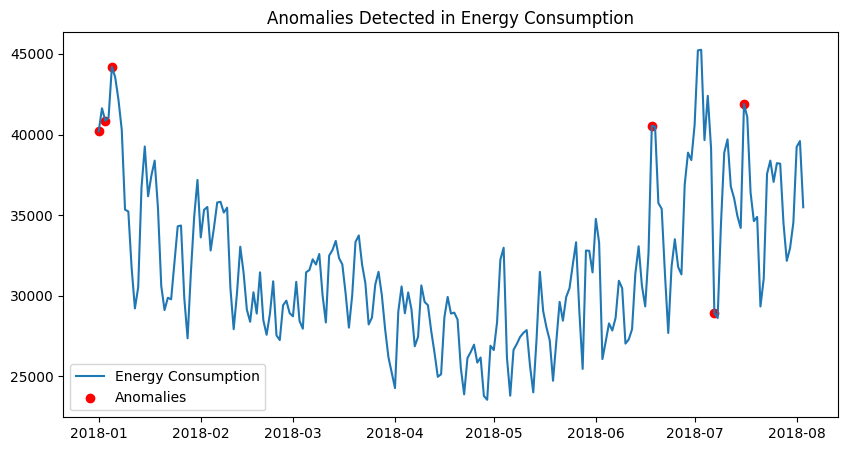

In [17]:
#=================================================-
#### Slide 24: ARIMA Residuals for Anomaly Detection (cont'd)  ####

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(pjm_energy_datewise, label="Energy Consumption")
plt.scatter(anomalies.index, pjm_energy_datewise[anomalies.index], color='red', label="Anomalies")  # Plot actual values
plt.legend()
plt.title("Anomalies Detected in Energy Consumption")
plt.show()




In [18]:
#=================================================-
#### Slide 26: Exercise 1  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
